### Import necessary modules

In [5]:
import numpy as np
import pandas as pd
from mne_connectivity.viz import plot_connectivity_circle
import matplotlib.pyplot as plt
from mne.viz import circular_layout  

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Circular plot for the connections which were showing significance (p(uncorr) < 0.01)

In [1]:
# the regions we want to keep from all possible regions
keepers = ['Ventromedial prefrontal cortex','Posterior cingulate cortex','Dorsomedial prefrontal cortex anteromedial','Superior frontal sulcus anterior LH','Thalamus','Superior frontal sulcus RH','Superior frontal sulcus anterior RH','Hippocampus posterior LH','Hippocampus anterior RH']

In [2]:
# for a better visualisation the names of the regions had to be shortened and brought into a new order
labels = ['vmPFC','PCC', 'ant-med dmPFC', 'ant SFS_LH', 'Thala', 'SFS_RH', 'ant SFS_RH', 'pos Hip_LH', 'ant Hip_RH']
label_order =['vmPFC','ant SFS_LH','Thala','pos Hip_LH','PCC','ant Hip_RH','SFS_RH','ant SFS_RH','ant-med dmPFC'] 

In [3]:
# setting the node colors
node_color_list = ['#CC6677','purple','#661100','#88CCEE','#DDCC77','#88CCEE','#88CCEE','seagreen','seagreen']

hc


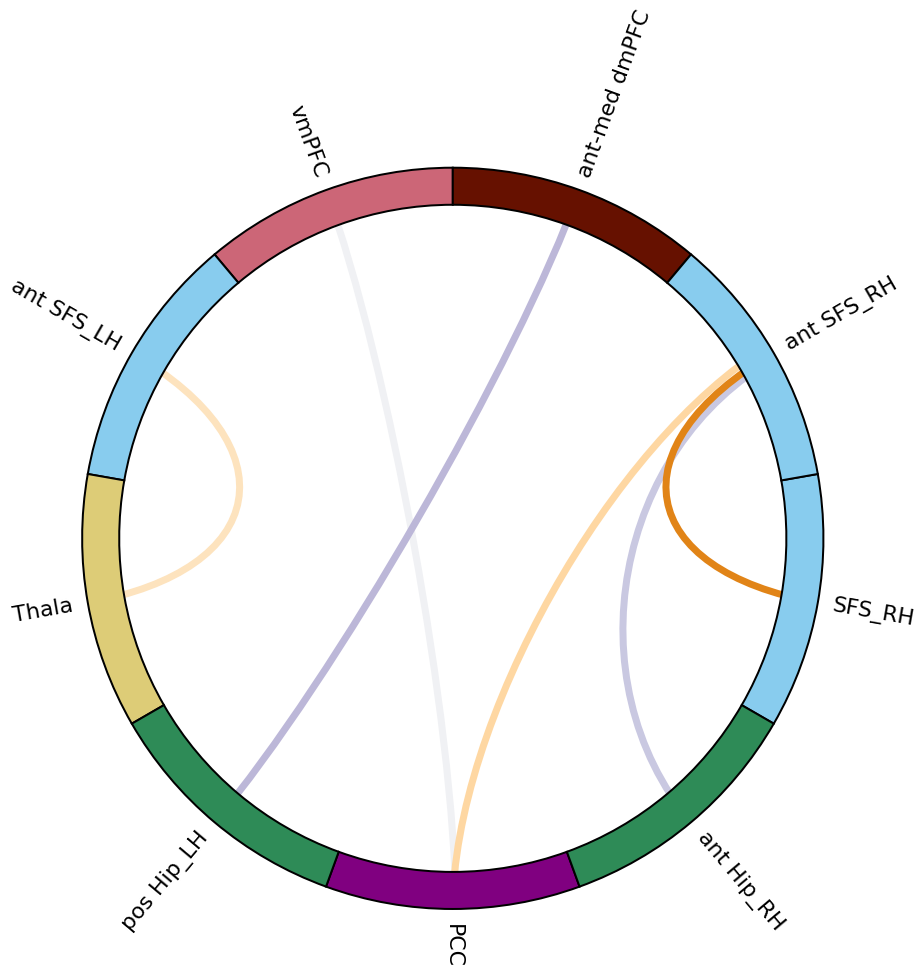

nr


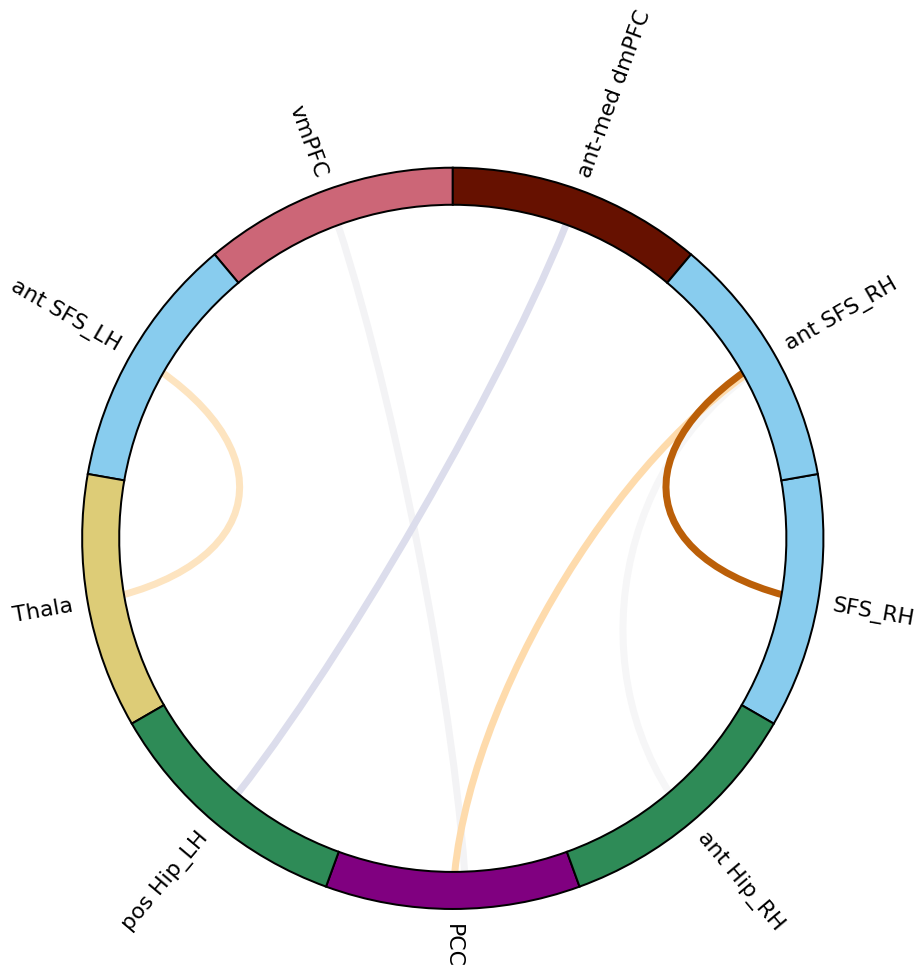

lr


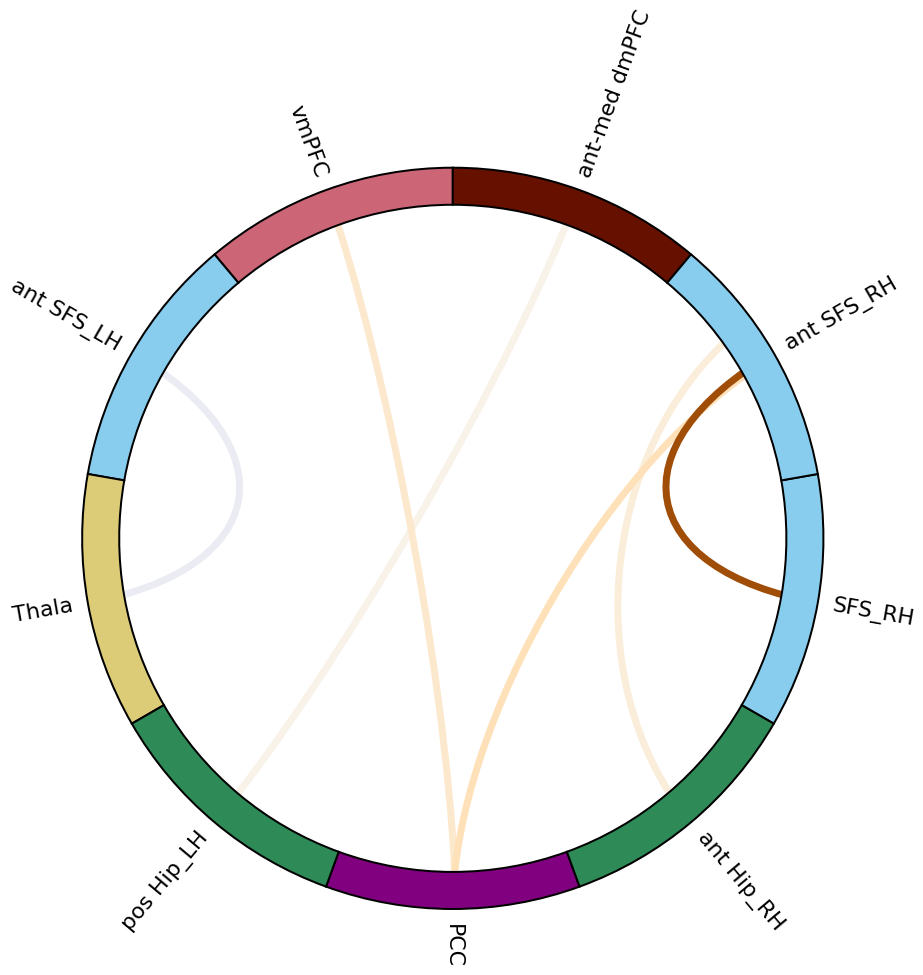

hr


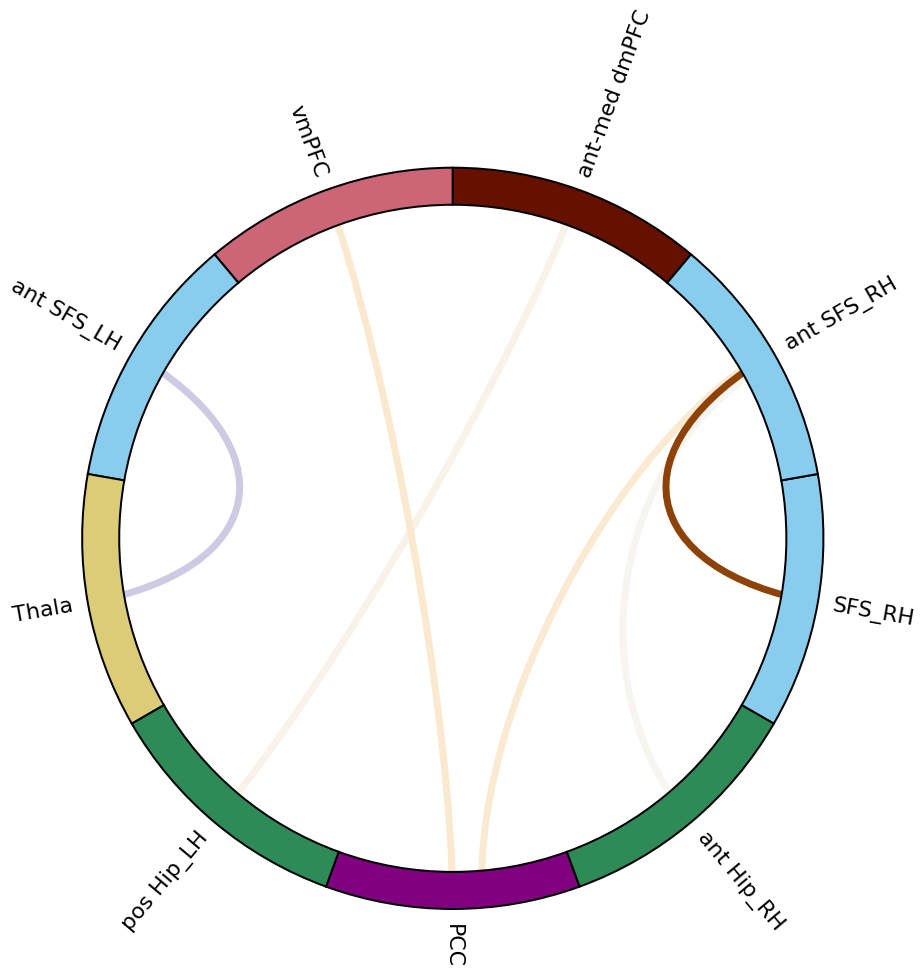

bd


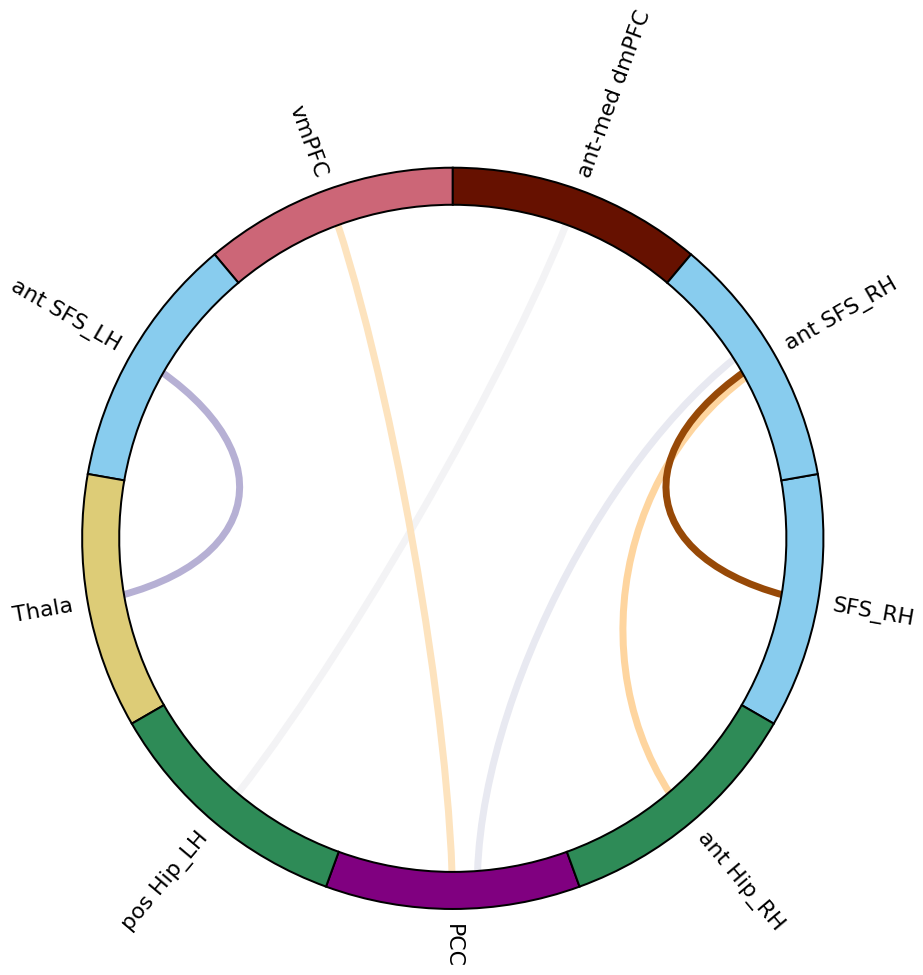

In [6]:
# loop over all groups to get a circularplot for every group
group_list = ['hc', 'nr', 'lr', 'hr', 'bd']
for group in group_list:
    print(group)
    # so that the group name is in capslock for the title
    name = group.upper()
    
    data_path = '/media/sf_shared_VB/MA_results/'
    matrix_path = f'/media/maria/Elements/Bipolife_BIDS/A1/derivatives/connectivity_matrices/groups/kind-partial correlation/group-{group}/2903/group-{group}_atlas-difumo_kind-partial correlation_matrix_with labels_2903.csv'
                    
    # load the matrix 
    df = pd.read_csv(matrix_path, index_col = 0)
    
    # throwing out all the rows of regions which are not included in keepers
    for i in df.index: 
        if i not in keepers:
            df = df.drop(labels=i, axis=0)
    # getting rid of all the columns of regions not included in keepers        
    selection = df[keepers]
    
    #for a more informative plot turn all values of no interest into zeros so the plot only shows the significant connections
    # connections of interest
    coi = [[0,1],[1,0],[1,6],[6,1],[3,4],[4,3],[2,7],[7,2],[5,6],[6,5],[6,8],[8,6]]
    
    # go through the whole matrix and turn the value of a connection to zero if the connection is not a coi
    for i in range(0,9):
        for j in range(0,9):
            if [i,j] not in coi: 
                selection.values[i,j] = 0
    # turn the matrix into a numpydarray
    selection = selection.to_numpy()
    
    #plot the circularplot
    fig = plt.figure(figsize=(15,15)) #

    # change the order of the labels/regions
    node_angles = circular_layout(labels, label_order, start_pos=90)

    # only shows the significant connections fo better visualisation
    plot_connectivity_circle(selection, labels, fig=fig, node_angles=node_angles,
                             #title = f'FC of the {name} group', fontsize_title =30, 
                             node_colors = node_color_list,
                             fontsize_names=22, linewidth=7, facecolor = 'white', 
                             textcolor='black', colormap = 'PuOr_r', padding = 1,
                             vmin = -0.2, vmax = 0.2, n_lines = 6, colorbar = False)
    # save the plot
    fname_fig = data_path + f'circularplot_selection_{group}_newcolor2_final.png'
    fig.savefig(fname_fig)   

### circularplot for the significant connections ( p(uncorr) < 0.01) regarding the IDSC score

In [7]:
keepers_idsc = ['Posterior cingulate cortex','Middle temporal gyrus LH','Parieto-occipital sulcus anterior','Anterior cingulate cortex','Superior frontal sulcus LH','Angular gyrus posterior LH','Parahippocampal gyrus LH','Parahippocampal gyrus RH','Pars triangularis LH','Superior frontal sulcus anterior LH2','Amygdala LH','Hippocampus anterior RH']

In [8]:
labels_idsc = ['PCC', 'MTG_LH', 'ant POS', 'ACC', 'SFS_LH', 'pos AG_LH', 'PHG_LH', 'PHG_RH', 'PT_LH', 'ant SFS_LH2', 'Amy_LH', 'ant Hip_RH']
label_order_idsc =['ACC', 'ant SFS_LH2', 'SFS_LH', 'PT_LH', 'Amy_LH','MTG_LH', 'PHG_LH','pos AG_LH','PCC', 'ant POS', 'ant Hip_RH', 'PHG_RH'] 

In [9]:
node_color_list_idsc = ['purple','navy','darkorange','orangered','#88CCEE','sienna','gold','gold','fuchsia','#88CCEE','greenyellow','seagreen']

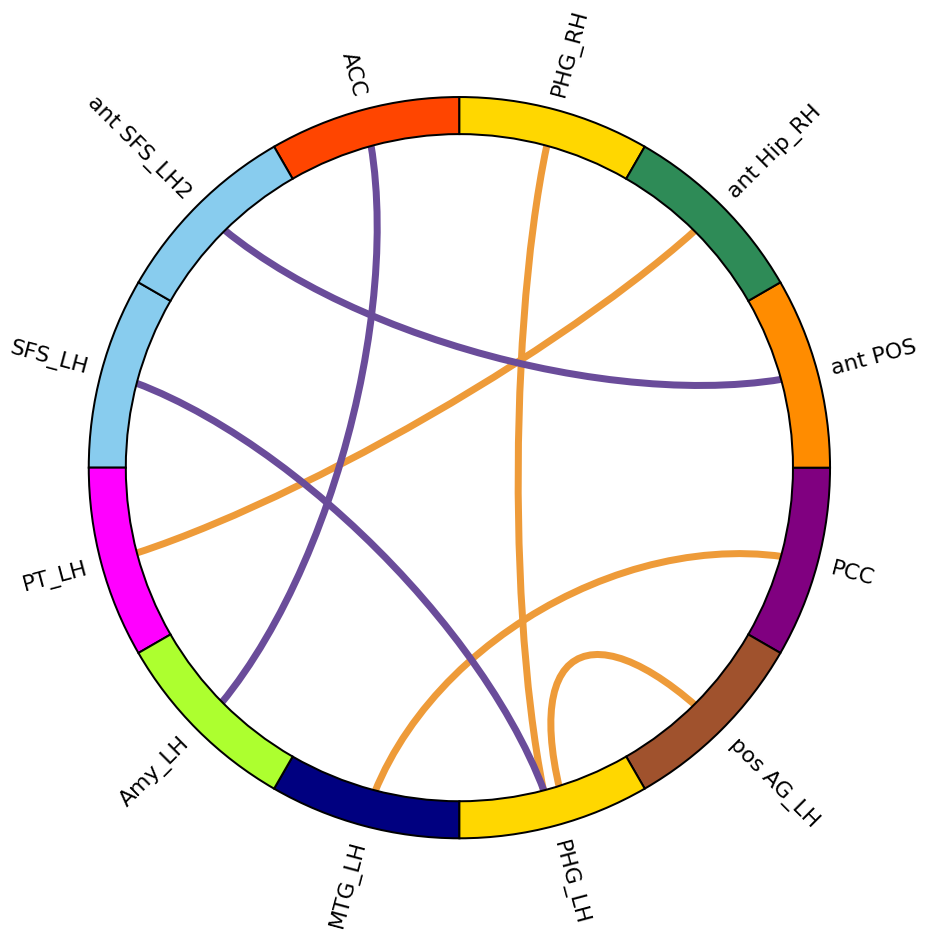

In [10]:
data_path = '/media/sf_shared_VB/MA_results/'
matrix_path = f'/media/maria/Elements/Bipolife_BIDS/A1/derivatives/connectivity_matrices/groups/kind-partial correlation/group-hc/2903/group-hc_atlas-difumo_kind-partial correlation_matrix_with labels_2903.csv'

# load the matrix and get rid of the names
df = pd.read_csv(matrix_path, index_col = 0)

# turn the pandas dataframe into a ndarray
for i in df.index: 
    if i not in keepers_idsc:
        df = df.drop(labels=i, axis=0)
selection_idsc = df[keepers_idsc]

#for clarity turn all values of no interest into zeros so the plot only shows the important connections
# one list containing all significant connections
coi_idsc = [[0,1],[1,0],[4,6],[6,4],[5,6],[6,5],[6,7],[7,6],[2,9],[9,2],[11,8],[8,11],[3,10],[10,3]]
# one list of the connections with an increase of the partial correlation according to IDSC score
coi_rise_idsc = [[0,1],[1,0],[5,6],[6,5],[6,7],[7,6],[11,8],[8,11]]
# one list of the connections with a decrease of the partial correlation according to IDSC score
coi_fall_idsc = [[4,6],[6,4],[2,9],[9,2],[3,10],[10,3]]

for i in range(0,12):
    for j in range(0,12):
        if [i,j] not in coi_idsc: 
            selection_idsc.values[i,j] = 0
        # turning the connections with an increase orange
        if [i,j] in coi_rise_idsc:
            selection_idsc.values[i,j] = 0.5
        # turning the connections with a decrease purple
        if [i,j] in coi_fall_idsc:
            selection_idsc.values[i,j] = -0.7

selection_idsc = selection_idsc.to_numpy()

fig = plt.figure(figsize=(15,15)) 

# change the order of the labels/regions
node_angles = circular_layout(labels_idsc, label_order_idsc, start_pos=90)

# only shows the 50 strongest connections fo better visualisation
plot_connectivity_circle(selection_idsc, labels_idsc, fig=fig, node_angles=node_angles,
                         #title = f'FC of the {name} group', fontsize_title =30, 
                         node_colors = node_color_list_idsc,
                         fontsize_names=22, linewidth=7, facecolor = 'white', 
                         textcolor='black', colormap = 'PuOr_r', padding = 1, 
                         vmin = -1, vmax = 1, n_lines = 7, colorbar = False)
# save the plot
fname_fig = data_path + f'circularplot_idsc_final.png'
fig.savefig(fname_fig)   

### YMRS

In [11]:
keepers_ymrs = ['Middle temporal gyrus RH','Posterior cingulate cortex','Hippocampal fissure','Dorsomedial prefrontal cortex anteromedial','Parieto-occipital sulcus anterior','Anterior cingulate cortex','Ventromedial prefrontal cortex anterior', 'Thalamus','Superior frontal sulcus anterior LH2','Superior frontal sulcus anterior RH','Angular gyrus inferior RH','Hippocampus anterior RH']

In [12]:
labels_ymrs = ['MTG_RH','PCC','HF','ant-med dmPFC','ant POS','ACC','ant vmPFC','Thala','ant SFS_LH2','ant SFS_RH','inf AG_RH','ant Hip_RH']
label_order_ymrs =['ant vmPFC','ant SFS_LH2','ACC','HF','Thala','ant POS','PCC','inf AG_RH','ant Hip_RH','MTG_RH','ant SFS_RH','ant-med dmPFC'] 

In [13]:
node_color_list_ymrs = ['navy','purple','deeppink','#661100','darkorange','orangered','#CC6677','#DDCC77','#88CCEE','#88CCEE','sienna','seagreen']

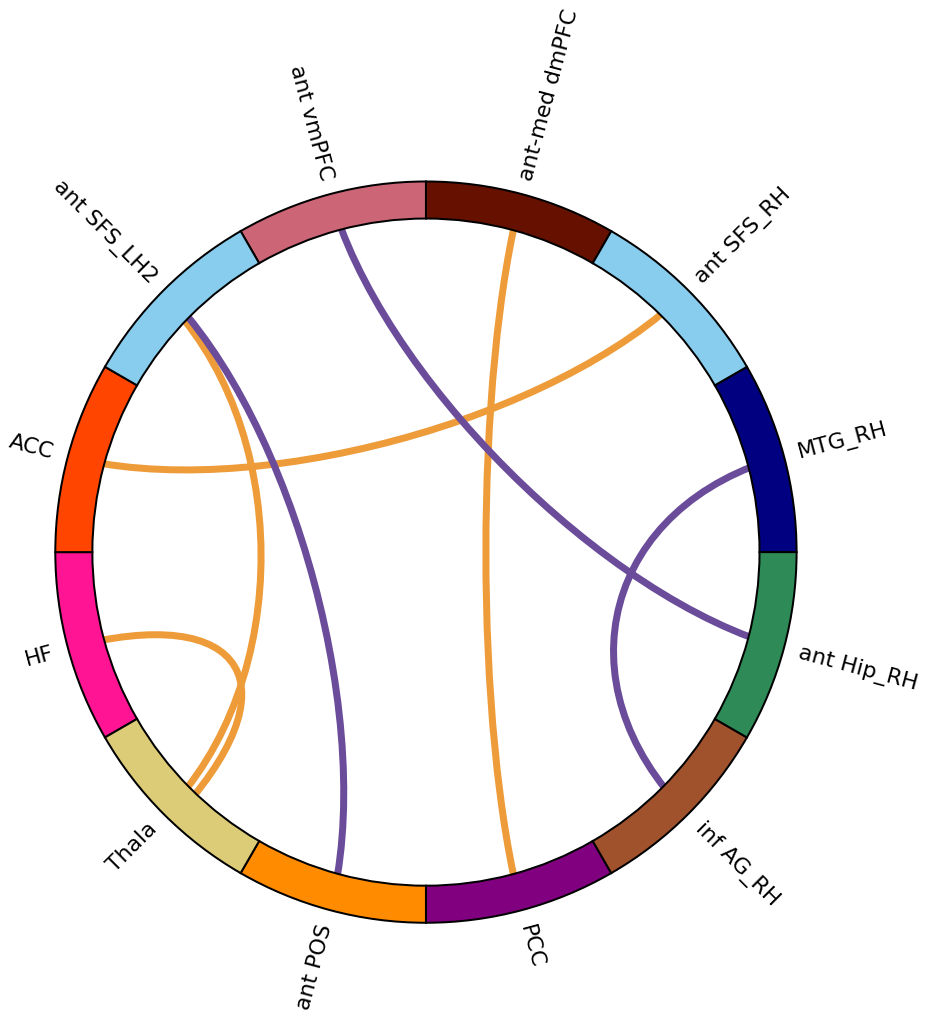

In [14]:
data_path = '/media/sf_shared_VB/MA_results/'
matrix_path = f'/media/maria/Elements/Bipolife_BIDS/A1/derivatives/connectivity_matrices/groups/kind-partial correlation/group-hc/2903/group-hc_atlas-difumo_kind-partial correlation_matrix_with labels_2903.csv'

# load the matrix and get rid of the names
df = pd.read_csv(matrix_path, index_col = 0)

# turn the pandas dataframe into a ndarray
for i in df.index: 
    if i not in keepers_ymrs:
        df = df.drop(labels=i, axis=0)
selection_ymrs = df[keepers_ymrs]

#for clarity turn all values of no interest into zeros so the plot only shows the important connections
# one list containing all significant connections
coi_ymrs = [[0,10],[10,0],[1,3],[3,1],[2,7],[7,2],[4,8],[8,4],[5,9],[9,5],[11,6],[6,11],[7,8],[8,7]]
# one list of the connections with an increase of the partial correlation according to YMRS score
coi_rise_ymrs = [[1,3],[3,1],[2,7],[7,2],[5,9],[9,5],[7,8],[8,7]]
# one list of the connections with a decrease of the partial correlation according to YMRS score
coi_fall_ymrs = [[0,10],[10,0],[4,8],[8,4],[11,6],[6,11]]

for i in range(0,12):
    for j in range(0,12):
        if [i,j] not in coi_ymrs: 
            selection_ymrs.values[i,j] = 0
        # turning the connections with an increase orange
        if [i,j] in coi_rise_ymrs:
            selection_ymrs.values[i,j] = 0.5
        # turning the connections with a decrease purple
        if [i,j] in coi_fall_ymrs:
            selection_ymrs.values[i,j] = -0.7

selection_ymrs = selection_ymrs.to_numpy()

fig = plt.figure(figsize=(15,15)) #

# change the order of the labels/regions
node_angles = circular_layout(labels_ymrs, label_order_ymrs, start_pos=90)

# only shows the 50 strongest connections fo better visualisation
plot_connectivity_circle(selection_ymrs, labels_ymrs, fig=fig, node_angles=node_angles,
                         #title = f'FC of the {name} group', fontsize_title =30, 
                         node_colors = node_color_list_ymrs,
                         fontsize_names=22, linewidth=7, facecolor = 'white', 
                         textcolor='black', colormap = 'PuOr_r', padding = 1, 
                         vmin = -1, vmax = 1, n_lines = 7, colorbar = False)
# save the plot
fname_fig = data_path + f'circularplot_ymrs_final.png'
fig.savefig(fname_fig, bbox_inches = 'tight')   